# Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Lambda, Input, Flatten, Layer, concatenate
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model


# Custom Models

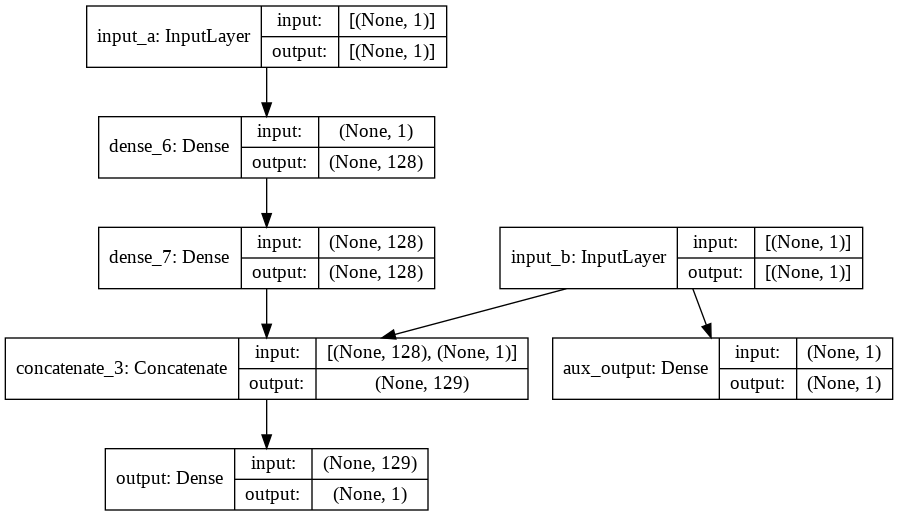

In [6]:
## Model
def model():
    input_a = Input(shape=[1], name='input_a')
    input_b = Input(shape=[1], name='input_b')
    h1 = Dense(128, activation='relu')(input_a)
    h2 = Dense(128)(h1)
    con = concatenate([h2, input_b])
    output = Dense(1, name= 'output')(con)
    aux_output = Dense(1, name= 'aux_output')(input_b)

    return Model(inputs = [input_a, input_b], outputs = [output, aux_output])

model = model()
plot_model(model, show_shapes=True)

In [ ]:
xs = np.array([1,2,3,4,5,6,7,8,9], dtype=float)
ys = 2*xs - 1

model.compile(loss = 'mse',
              optimizer='sgd')

model.fit([xs, xs], ys, epochs=500, verbose=0)

k = np.array([10])
model.predict([k,k])

# Class Implementation

In [89]:
class WideDeepModel(Model):
    def __init__(self, units = 128, activation = 'relu'):
        super(WideDeepModel, self).__init__()
        self.h1 = Dense(units, activation=activation)
        self.h2 = Dense(units, activation=activation)
        self.out1 = Dense(1)
        self.out2 = Dense(1)

    def call(self, inputs, training=None, mask=None):
        inputs_a, inputs_b = inputs
        h1 = self.h1(inputs_a)
        h2 = self.h2(h1)
        con = concatenate([inputs_b, h2])
        out1 = self.out1(con)
        out2 = self.out2(h2)
        return out1, out2

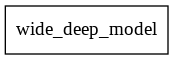

In [94]:
#wide_model = WideDeepModel()
plot_model(wide_model, show_shapes=True)

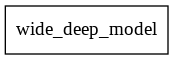

In [96]:
wide_model.compile(loss = 'mse',
              optimizer='sgd')

wide_model.fit([xs, xs], ys, epochs=500, verbose=0)
plot_model(wide_model, show_shapes=True)

# Data 2 , Mnist

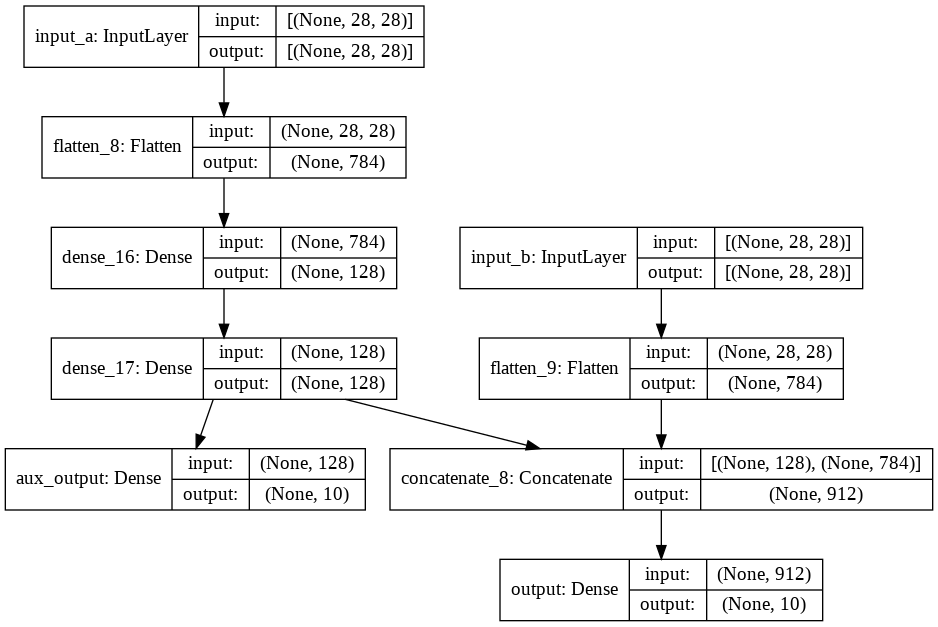

In [51]:
## Model
def mnist_model():
    input_a = Input(shape=(28,28), name='input_a')
    flat_a = Flatten()(input_a)
    input_b = Input(shape=(28,28), name='input_b')
    flat_b = Flatten()(input_b)
    h1 = Dense(128, activation='relu')(flat_a)
    h2 = Dense(128)(h1)
    con = concatenate([h2, flat_b])
    output = Dense(10, name= 'output', activation='softmax')(con)
    aux_output = Dense(10, name= 'aux_output', activation='softmax')(h2)

    return Model(inputs = [input_a, input_b], outputs = [output, aux_output])

mnist_model = mnist_model()
plot_model(mnist_model, show_shapes=True)

In [47]:
x_train.shape

(60000, 28, 28)

In [46]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [52]:
mnist_model.compile(loss = tf.losses.sparse_categorical_crossentropy,
              optimizer=tf.optimizers.RMSprop(),
              metrics= ['accuracy'])


mnist_model.fit([x_train, x_train], y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7989 - output_loss: 0.4226 - aux_output_loss: 0.3764 - output_accuracy: 0.8793 - aux_output_accuracy: 0.8886
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2211 - output_loss: 0.1133 - aux_output_loss: 0.1078 - output_accuracy: 0.9669 - aux_output_accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1573 - output_loss: 0.0809 - aux_output_loss: 0.0765 - output_accuracy: 0.9765 - aux_output_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1256 - output_loss: 0.0648 - aux_output_loss: 0.0608 - output_accuracy: 0.9814 - aux_output_accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1134 - output_loss: 0.0583 - aux_output_loss: 0.0551 - output_accuracy: 0.9846 - aux_output_accuracy: 0.9843


In [60]:
mnist_model.evaluate([x_test, x_test], y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2101 - output_loss: 0.1069 - aux_output_loss: 0.1033 - output_accuracy: 0.9734 - aux_output_accuracy: 0.9731


[0.21010883152484894,
 0.10685611516237259,
 0.1032528355717659,
 0.9733999967575073,
 0.9731000065803528]